<a href="https://colab.research.google.com/github/Stephane-Masamba/Team_4_CPT_ML-Classification/blob/master/Team_4_CPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                       *Climate* *Change* *Belief* *Analysis*



---











#Introduction

Many companies are built around lessening their environmental impact and thus they offer products that are environmentally friendly and sustainable. With that, they would like to determine how people perceive climate change.






This notebook aims to build Machine Learning Classification model(s) that is able to classify accurately whether or not a person believes in climate change based on their novel tweet.
 

This will be done by importing necesarry libraries as well as the training and test datasets. Data cleaning follows together with exploratory data analysis.We then wrap up the notebook by diving into different classification techniques under the Modelling section which will be followed by insights and a conclusion.




The following are some of the few classification techniques explored in this notebook:


1.Support Vector Machines

2.Naive Bayes Classfier

3.K-Nearest Neighbors

4.Random Forest

5.Tree based models

Because this is **sentiment analysis**,the interpretation and classification of emotions within text data, we will use some natural language preprocessing techniques libraries like nltk,spacy together with scikit learn.

#*COMET*

In [60]:
!pip install comet_ml

     |████████████████████████████████| 215kB 4.5MB/s 
     |████████████████████████████████| 419kB 14.5MB/s 
     |████████████████████████████████| 204kB 20.0MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=c730c62394b37ef72e03cc95492f76fb3182d44869f80b31b3cda031b208e7a7
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [61]:
import comet_ml

#Imports

###Import Libraries

In [62]:
!pip install spacy
!pip install NLTK

In [63]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns

#Natural Language Processing
import re
import spacy.cli
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


#Matrix measurement
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

#Resampling techniques
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#Machine Learning Models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  KFold


from wordcloud import WordCloud 

# from google.colab import drive

In [64]:
spacy.cli.download('en_core_web_sm')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
nlp = spacy.load('en_core_web_sm')

#Read in the datasets

In [66]:
train = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/train%20(1).csv')
print(train.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954


In [67]:
test = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/test%20(1).csv')
print(test.head())

                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


#Data description

The data available aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. 

In total, 43943 tweets were collected. 

Each tweet is labelled as one of four classes.



###Classes and description

Class 2 : News-the tweet links to factual news about climate change

Class 1 : Pro-the tweet supports the belief of man-made climate change

Class 0 : Neutral-the tweet neither supports nor refutes the belief of man-made climate change

Class -1 : Anti-the tweet does not believe in man-made climate change

###Variables definitions

Sentiment: Sentiment of tweet

Message: Tweet body

Tweetid: Twitter unique id

#Data Cleaning

Knowing that we are dealing with text data, we decided to first clean the data by making all tweets lower-case, removing punctuation marks and removing white spaces before doing anything else. Also, replacing all links with the word 'LINK' and all user handles with 'USER_REF'

In [68]:

i = 0
for tweet in train['message']:
  tweet = tweet.lower()
  tweet = re.sub(r'http\S+', 'LINK', tweet)
  tweet = re.sub(r'@\S+', 'USER_REF', tweet)
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweet = tweet.lstrip()
  tweet = tweet.rstrip()
  tweet = tweet.replace('  ', ' ')
  train.loc[i, 'message'] = tweet
  i += 1

  

In [69]:
train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt USER_REF researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in ...,573736
4,1,rt USER_REF its 2016 and a racist sexist clima...,466954
...,...,...,...
15814,1,rt USER_REF they took down the material on glo...,22001
15815,2,rt USER_REF how climate change could be breaki...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt USER_REF hey liberals the climate change cr...,819732


In [70]:
i = 0
for tweet in test['message']:
  tweet = tweet.lower()
  tweet = re.sub(r'http\S+', 'LINK', tweet)
  tweet = re.sub(r'@\S+', 'USER_REF', tweet)
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweet = tweet.lstrip()
  tweet = tweet.rstrip()
  tweet = tweet.replace('  ', ' ')
  test.loc[i, 'message'] = tweet
  i += 1

In [71]:
test

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,USER_REF USER_REF USER_REF USER_REF \nputin go...,476263
4,rt USER_REF female orgasms cause global warmin...,872928
...,...,...
10541,rt USER_REF brb writing a poem about climate c...,895714
10542,2016 the year climate change came home during ...,875167
10543,rt USER_REF pacific countries positive about f...,78329
10544,rt USER_REF youre so hot you must be the cause...,867455


Here we add 'LINK' and 'USER_REF' to our list of stop words and remove all stop words from each tweet

In [72]:
def remove_stopwords(df):
    my_stop_words = stopwords.words('english')
    my_stop_words.append('LINK')
    my_stop_words.append('USER_REF')

    df_index = 0

    for tweet in df['message']:
      tweet = word_tokenize(tweet)
      tweet = [word for word in tweet if not word in my_stop_words]
      tweet = ' '.join(tweet)

      df.loc[df_index, 'message'] = tweet
      df_index += 1

    return df

In [73]:
remove_stopwords(train)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired 2016 pivotal year war clima...,573736
4,1,rt 2016 racist sexist climate change denying b...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking 200millionyea...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [74]:
remove_stopwords(test)

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,2016 year climate change came home hottest yea...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


###Find all named entities for each tweet

In [75]:
def entities(df):
    df_index = 0

    for tweet in df['message']:
      tweet = nlp(tweet)

      for entity in tweet.ents:
        df.loc[df_index, 'message'] = df.loc[df_index, 'message'].replace(str(entity.text), str(entity.label_))

      df_index += 1

      return df

In [76]:
entities(train)

,sentiment,message,tweetid
0,1,ORG chief doesnt think carbon dioxide main cau...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired 2016 pivotal year war clima...,573736
4,1,rt 2016 racist sexist climate change denying b...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking 200millionyea...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [77]:
entities(test)

,message,tweetid
0,LOC looking GPE make sure alone fighting clima...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,2016 year climate change came home hottest yea...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


###Lemmatize every word in each tweet

In [78]:
def lem_text(df):
    df_index = 0

    for tweet in df['message']:
      tweet = nlp(tweet)
      
      for token in tweet:
        df.loc[df_index, 'message'] = df.loc[df_index, 'message'].replace(str(token.text), str(token.lemma_))

      df_index += 1

      return df

In [79]:
lem_text(train)

,sentiment,message,tweetid
0,1,ORG chief donot think carbon dioxide main caus...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired 2016 pivotal year war clima...,573736
4,1,rt 2016 racist sexist climate change denying b...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking 200millionyea...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [80]:
lem_text(test)

,message,tweetid
0,LOC look GPE make sure alone fight climate change,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,2016 year climate change came home hottest yea...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


#Exploratory Data Analysis

Now it is time to analyse the data and how it is structured.

###Missing values

In [81]:
train.isnull().sum()


sentiment    0
message      0
tweetid      0
dtype: int64

In [82]:
test.isnull().sum()

message    0
tweetid    0
dtype: int64

There are no missing values in both the train and test datasets.

###Sentiment Classes

In [83]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

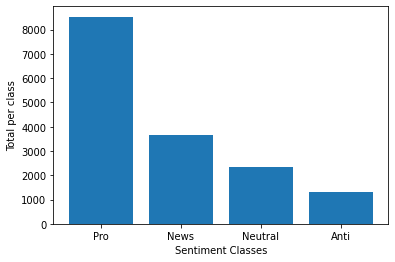

In [84]:
counts = train["sentiment"].value_counts()
plt.bar(range(len(counts)), counts)
plt.xticks([0, 1, 2, 3], ['Pro', 'News', 'Neutral', 'Anti'])

plt.ylabel("Total per class")
plt.xlabel("Sentiment Classes")
plt.show()

In [85]:
#Percentage of the major class
len(train[train.sentiment==1])/len(train.sentiment)

0.5392249826158417

The 'Pro' climate change class accounts for 54% of the data set and the remaining 46% is shared amongst the three other classes. This imbalance indicates how biased our model might me thus exploring resampling techniques might be required in order to improve the model accuracy.

###Word Cloud

Below we show some of the words used in the different tweets under each class.

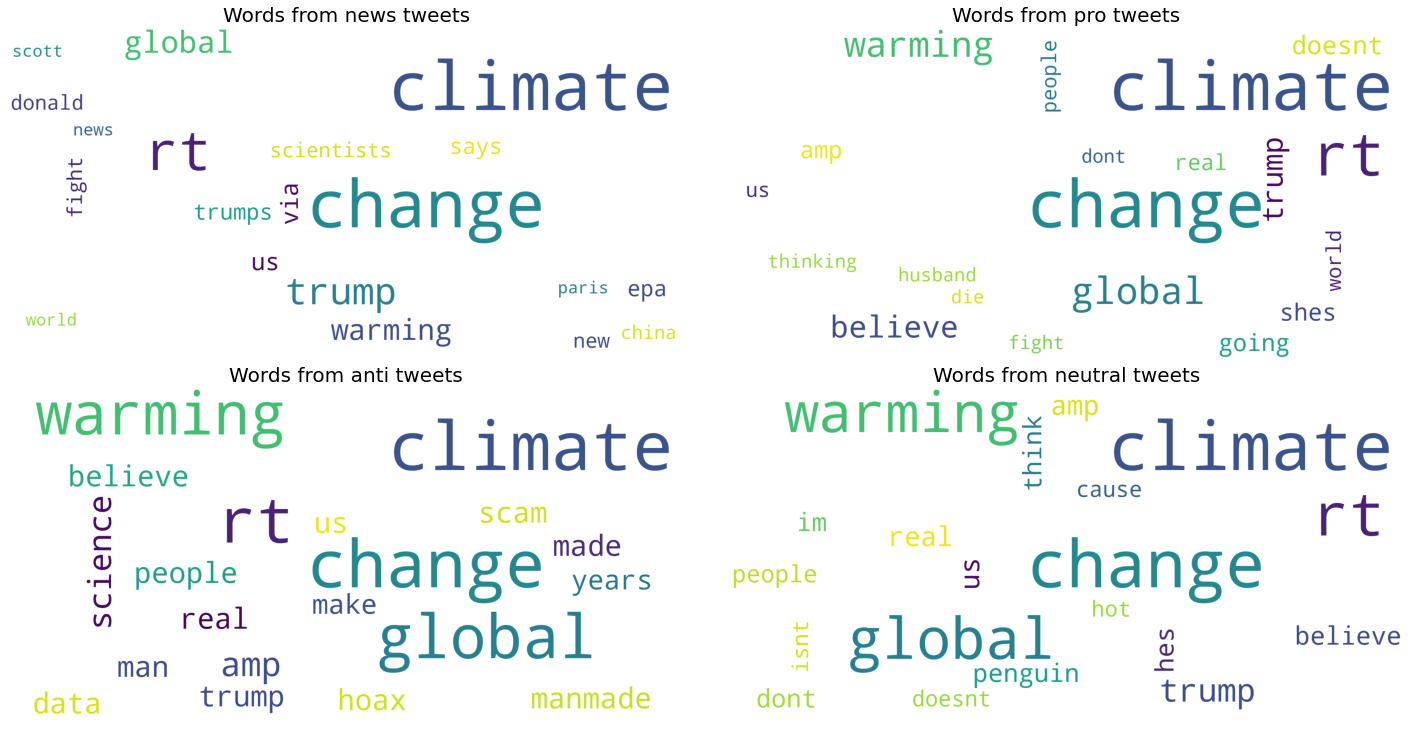

In [86]:
#word clouds
news = train[train['sentiment'] == 2]['message']
pro = train[train['sentiment'] == 1]['message']
neutral =train[train['sentiment'] == 0]['message']
Anti = train[train['sentiment'] ==-1]['message']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
Anti= [word for line in Anti for word in line.split()]

news = WordCloud(
    background_color='white',
    max_words=20,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

pro = WordCloud(
    background_color='white',
    max_words=20,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pro))



neutral = WordCloud(
    background_color='white',
    max_words=20,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))


Anti = WordCloud(
    background_color='white',
    max_words=20,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(Anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('Words from news tweets', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Words from pro tweets', fontsize = 20)
axs[0, 1].axis('off')


axs[1, 0].imshow(Anti)
axs[1, 0].set_title('Words from anti tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Words from neutral tweets', fontsize = 20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')

#Define our feature and target variable to use when modelling

In [87]:
X = train['message']
X

0        ORG chief donot think carbon dioxide main caus...
1          like lack evidence anthropogenic global warming
2        rt researchers say three years act climate cha...
3        todayinmaker wired 2016 pivotal year war clima...
4        rt 2016 racist sexist climate change denying b...
                               ...                        
15814    rt took material global warming lgbt rights he...
15815    rt climate change could breaking 200millionyea...
15816    notiven rt nytimesworld trump actually believe...
15817    rt hey liberals climate change crap hoax ties ...
15818             rt climate change equation 4 screenshots
Name: message, Length: 15819, dtype: object

In [88]:
y = train['sentiment']
y

0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64

###Convert features to machine language

In [89]:
tf_vecto = TfidfVectorizer(lowercase = True,stop_words = 'english',ngram_range=(1, 2))
X = tf_vecto.fit_transform(X)

###Splitting the data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [91]:
#X_test = test['message']

In [92]:
#X_test = tf_vect.transform(X_test)

#Modelling

##Modelling with maximum data cleaning

The function below takes in a model and splits our training data into a train and test set. Once this is done, the function calculates the accuracy score for both the train and test set and returns the avergace accuracy score for both.

In [93]:
def accuracy(model):
    features = train['message']
    target = train['sentiment']

    train_scores = []
    test_scores = []

    #tf_vect = TfidfVectorizer(ngram_range=(1, 2))
    tf_vecto = TfidfVectorizer(lowercase = True,stop_words = 'english',ngram_range=(1, 2))


    folds = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in folds.split(features):
        x_train, x_test = features.iloc[train_index], features.iloc[test_index]    
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        x_train = tf_vecto.fit_transform(x_train)
        x_test = tf_vecto.transform(x_test)
     
        model.fit(x_train, y_train)
        train_predictions = model.predict(x_train)
        test_predictions = model.predict(x_test)

        train_score = accuracy_score(y_train, train_predictions)
        train_scores.append(train_score)

        test_score = accuracy_score(y_test, test_predictions)
        test_scores.append(test_score)

    avg_train_accuracy = np.mean(train_scores)
    avg_test_accuracy = np.mean(test_scores)

    return [avg_train_accuracy, avg_test_accuracy]


###Support Vector Machines(SVM)

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes

In [94]:
sv = SVC()

sv_accuracy = accuracy(sv)
sv_accuracy

[0.9735128365286878, 0.7090841761150279]

###Bernoulli Naive Bayes

The Bernoulli naive Bayes classifier assumes that all our features are binary such that they take only two values (e.g. a nominal categorical feature that has been one-hot encoded)

In [95]:
bernoulli = BernoulliNB()

bernoulli_accuracy = accuracy(bernoulli)
bernoulli_accuracy

[0.7299607721397527, 0.6203299808588]

###Multi Nomial Naive Bayes

In summary, Naive Bayes classifier is a general term which refers to conditional independence of each of the features in the model, while Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features

In [96]:
mnb = MultinomialNB()

mnb_accuracy = accuracy(mnb)
mnb_accuracy

[0.7230387343589303, 0.6379662644843007]

###Stochastic Gradient Descent (SGD)

 SGD is a simple,efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It has received a considerable amount of attention just recently in the context of large-scale learning.

In [97]:
sgd = SGDClassifier()

sgd_accuracy = accuracy(sgd)
sgd_accuracy

[0.9517984763896082, 0.7264689941737049]

###Random Forest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [98]:
rand_forest = RandomForestClassifier()

rand_forest_accuracy = accuracy(rand_forest)
rand_forest_accuracy

[0.9971553070622138, 0.6757690753509387]

###K-Nearest Neighbors (KNN)

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method proposed by Thomas Cover used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. ... In k-NN classification, the output is a class membership.

In [99]:
knn = KNeighborsClassifier()

knn_accuracy = accuracy(knn)
knn_accuracy

[0.7349706396686149, 0.627094310678983]

###Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [100]:
grad_booster = GradientBoostingClassifier()

grad_booster_accuracy = accuracy(grad_booster)
grad_booster_accuracy

[0.6831658059530843, 0.6440996621412324]

###Extra Trees Classifier

An extra-trees classifier is a class that implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The number of trees in the forest.

In [ ]:
extra_trees = ExtraTreesClassifier()

extra_trees_accuracy = accuracy(extra_trees)
extra_trees_accuracy

###Bagging

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. ... If None, then the base estimator is a decision tree.

In [ ]:
bagging = BaggingClassifier()

bagging_accuracy = accuracy(bagging)
bagging_accuracy

###Decision Tree Classifier

The decision tree classifier (Pang-Ning et al., 2006) creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [ ]:
dec_tree = DecisionTreeClassifier()

dec_tree_accuracy = accuracy(dec_tree)
dec_tree_accuracy

###Linear SVC

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data provided, returning a "best fit" hyperplane that divides, or categorizes, data. After getting the hyperplane,the features are fed to the classifier to see what the "predicted" class is. 

In [ ]:
linear_sv = LinearSVC()

linear_sv_accuracy = accuracy(linear_sv)
linear_sv_accuracy

##Plot all models and respective accuracy scores

Below is a graph of all models which allows for simplified comparison


In [ ]:
models = ['SVC', 'Bernoulli', 'Multinomial Naive Bayes', 'SGDClassifier', 'Random Forest', 'KNearestNeighbours', 'Gradient Booster', 'Extra Trees', 'Bagging', 'Decision Tree', 'Linear SV']
bar_widths = [sv_accuracy[1], bernoulli_accuracy[1], mnb_accuracy[1], sgd_accuracy[1], rand_forest_accuracy[1], knn_accuracy[1], grad_booster_accuracy[1], extra_trees_accuracy[1], bagging_accuracy[1], dec_tree_accuracy[1], linear_sv_accuracy[1]]
bar_positions = arange(11) + 0.75
tick_positions = range(1,12)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(models)

ax.set_ylabel('Model')
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy For Each Model Trained')

plt.show()

###Fit best models and use the metrics module

In [ ]:
linear_sv.fit(X_train, y_train)

In [ ]:
#confusion matrix and classification_report
y_pred = linear_sv.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print('\n\nAccuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("\n\nClassification Report:\n\n", classification_report(y_test,y_pred,target_names=['Anti', 'Neutral','Pro','News']))

Below is a visual of the confusion matrix

In [ ]:
sentiment_code = {1:'Pro', 2:'News', 0:'Neutral', -1:'Anti'}

In [ ]:
train['sentiment_code'] = train['sentiment'].map(sentiment_code)

In [ ]:
aux_train = train[['sentiment', 'sentiment_code']].drop_duplicates().sort_values('sentiment_code')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cbar=False,
            fmt='g',
            xticklabels=aux_train['sentiment'].values, 
            yticklabels=aux_train['sentiment'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
sgd.fit(X_train,y_train)

In [ ]:
y_predict = sgd.predict(X_test)

print(confusion_matrix(y_test,y_predict))

print('\n\nAccuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("\n\nClassification Report:\n\n", classification_report(y_test,y_predict,target_names=['Anti', 'Neutral','Pro','News']))



In [ ]:
sentiment_code = {1:'Pro', 2:'News', 0:'Neutral', -1:'Anti'}

In [ ]:
train['sentiment_code'] = train['sentiment'].map(sentiment_code)

In [ ]:
aux_train = train[['sentiment', 'sentiment_code']].drop_duplicates().sort_values('sentiment_code')
conf_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cbar=False,
            fmt='g',
            xticklabels=aux_train['sentiment'].values, 
            yticklabels=aux_train['sentiment'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

##Modelling with resampled data


Since there has already been an observation that the data is imbalanced, one must attempt improving the accuracy of the above modelling. 


This will be done by introducing resampling techniques, Downsampling and SMOTE.

###Downsampling

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/train%20(1).csv')
print(train.head())

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/test%20(1).csv')
print(test.head())

Clean the data by calling the cleaning functions

In [ ]:
clean_text(train)
remove_stopwords(train)
entities(train)
lem_text(train)

In [ ]:
train_majority = train[train.sentiment== 1]
train_0 = train[train.sentiment== 0]
train_2 = train[train.sentiment== 2]

train_minority = train[train.sentiment==-1]



In [ ]:
# Downsample majority classes
train_majority_downsampled = resample(train_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1296,     # to match minority class
                                 random_state=123) # reproducible results


train_0_downsampled = resample(train_0, 
                                 replace=False,    
                                 n_samples=1296,     
                                 random_state=123) 

train_2_downsampled = resample(train_2, 
                                 replace=False,    
                                 n_samples=1296,     
                                 random_state=123) 

                      



# Combine minority class with downsampled majority class
train_downsampled1 = pd.concat([train_0_downsampled,train_2_downsampled])

train_downsampled2 = pd.concat([train_majority_downsampled, train_minority])

train_downsampled =  pd.concat([train_downsampled1, train_downsampled2])

In [ ]:
train_downsampled

In [ ]:
train_downsampled['sentiment'].value_counts()

In [ ]:
counts = train["sentiment"].value_counts()
counti = train_downsampled['sentiment'].value_counts()

plt.bar(range(len(counts)), counts)
plt.bar(range(len(counts)),counti,color='red')
plt.xticks([0, 1, 2, 3], ['Pro', 'News', 'Neutral', 'Anti'])

plt.ylabel("Total per class")
plt.xlabel("Sentiment Classes")
plt.legend(['original','resampled'])
plt.show()

Now that the data is balanced, we go ahead and build a model. This time we check the performance with onlyy the two best performing models as per the above graph.

In [ ]:
X_down = train['message']
X_down

In [ ]:
y_down = train['sentiment']
y_down

In [ ]:
X_down = tf_vecto.fit_transform(X_down)
X_down

In [ ]:
#train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_down,y_down,test_size=0.2,random_state=0)

In [ ]:

lsvm = LinearSVC()
lsvm.fit(X_train1, y_train1)

In [ ]:
#confusion matrix and classification_report
y_pred1 = lsvm.predict(X_test1)

print(confusion_matrix(y_test1,y_pred1))

print('\n\nAccuracy score: ' + str(accuracy_score(y_test1, y_pred1)))
print("\n\nClassification Report:\n\n",classification_report(y_test1,y_pred1,target_names=['Anti', 'Neutral','Pro','News']))

In [ ]:
sentiment_code = {1:'Pro', 2:'News', 0:'Neutral', -1:'Anti'}

In [ ]:
train['sentiment_code'] = train['sentiment'].map(sentiment_code)

In [ ]:
aux_train = train[['sentiment', 'sentiment_code']].drop_duplicates().sort_values('sentiment_code')
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cbar=False,
            fmt='g',
            xticklabels=aux_train['sentiment'].values, 
            yticklabels=aux_train['sentiment'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

###SMOTE 

Using data from the first data split

In [ ]:
print(X_train.shape,y_train.shape)

In [ ]:
smote = SMOTE("minority")
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
print(X_sm.shape,y_sm.shape)

In [ ]:
ls= LinearSVC()
ls.fit(X_sm, y_sm)


#confusion matrix and classification_report
y_predsm = ls.predict(X_test)

print(confusion_matrix(y_test,y_predsm))

print('\n\nAccuracy score: ' + str(accuracy_score(y_test, y_predsm)))
print("\n\nClassification Report:\n\n",classification_report(y_test,y_predsm,target_names=['Anti', 'Neutral','Pro','News']))

In [ ]:
sentiment_code = {1:'Pro', 2:'News', 0:'Neutral', -1:'Anti'}

In [ ]:
train['sentiment_code'] = train['sentiment'].map(sentiment_code)

In [ ]:
aux_train = train[['sentiment', 'sentiment_code']].drop_duplicates().sort_values('sentiment_code')
conf_matrix = confusion_matrix(y_test, y_predsm)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cbar=False,
            fmt='g',
            xticklabels=aux_train['sentiment'].values, 
            yticklabels=aux_train['sentiment'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

##Modelling with minimal data cleaning

To conclude the modelling section, we will explore what one could have done by intuition. This is just to check how accurate our model would be if we did not introduce the 'fancy' cleaning functions.

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/train%20(1).csv')
print(train.head())

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/test%20(1).csv')
print(test.head())


In [ ]:
sample = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/sample_submission.csv')
print(sample.head())


This time we only call one cleaning function which is the clean_text() function. This does not include tokenization as well as lemmatization

In [ ]:
clean_text(train)
remove_stopwords(train)

In [ ]:
clean_text(test)
remove_stopwords(test)

###Features and Modelling

In [ ]:
X_min = train['message']
X_min


In [ ]:
y_min = train['sentiment']
y_min


###Convert to machine language

In [ ]:
X_min = tf_vecto.fit_transform(X_min)


In [ ]:
#train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_min,y_min,test_size=0.2,random_state=0)

###Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier()

sgd_accuracy = accuracy(sgd)
sgd_accuracy



###Linear SVC

In [ ]:
linear_sv = LinearSVC()

linear_sv_accuracy = accuracy(linear_sv)
linear_sv_accuracy


In [ ]:
linear_sv.fit(X_train2, y_train2)


In [ ]:
#confusion matrix and classification_report
y_pred2 = linear_sv.predict(X_test2)


print(confusion_matrix(y_test1,y_pred1))

print('\n\nAccuracy score: ' + str(accuracy_score(y_test2, y_pred1)))
print("\n\nClassification Report:\n\n",classification_report(y_test2,y_pred2,target_names=['Anti', 'Neutral','Pro','News']))

In [ ]:
sentiment_code = {1:'Pro', 2:'News', 0:'Neutral', -1:'Anti'}

In [ ]:
train['sentiment_code'] = train['sentiment'].map(sentiment_code)

In [ ]:
aux_train = train[['sentiment', 'sentiment_code']].drop_duplicates().sort_values('sentiment_code')
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cbar=False,
            fmt='g',
            xticklabels=aux_train['sentiment'].values, 
            yticklabels=aux_train['sentiment'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#Results and ending comet experiment

In [ ]:
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="kyaDe1YHDUV60KbpzF3dVpIuk",
                        project_name="general", workspace="rachel-ramonyai")

In [ ]:
f1 = f1_score(y_test, y_predsm,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')

In [ ]:
params = {"kernel": 'linear',
          "model_type": "SVC",
          "stratify": True
          }

In [ ]:
params = {
          "model_type": "Best LinearSVC",
          "stratify": True
          }

metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [ ]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

#Model Analysis and Insights

We worked with various models, and at first the linear SV model and the SGD classifier performed the best, with around 70% accuracy. 

We then decided to fit these two models and increase their performance. Both of the models achieved different precision,recall & F1 scores.

With the SV model performing better with precision, but acheiving an accuarcy of 72%. While the SGD model achieved better scores in the other categories, however both models achieved the same accuracy at first.

The last model we made after extensive cleaning achieved a lower accuracy by 1%, but the predictions between anti,pro,neutral and news were closer together. Without a clear leader. This better reflects the real world findings.


The 'Pro' climate change class accounts for 54% of the data set and the remaining 46% is shared amongst the three other classes. 

This 54% count for 'Pro' class means more people agree that climate change is a real threat to our eco-system. Companies that offer products and services which are environmentally friendly and sustainable are more likely to receive support from people based on the shared sentiments and beliefs about climate change. 

The market reasearch done by these companies has positive results which is an indication for prospects of goood profit margins for eco-friendly products and services.

Accuracy on holdout data set is always lower and this shows that our model tends to be slightly overfitting the training data...best performing model is linear svc.



#Conclusion

Our model predicted the news category best, while the other categories did improve, with our model being able to predict anti sentiment the second best. Although only more accurate by a couple of percent. So overall the model performed as anticipated.

Through the classification techniques, companies will be able to  access a broad base of consumer sentiments, spanning multiple demographic and geographic categories, this will increase their insights and inform  strategies.

This includes adding to their market research efforts in gauging how their product or service may be received.

Based on the findings it can be concluded that more customers will be receptive to eco-friendly products and services provided by companies. 

The results prove that more people believe that climate change is a threat to our lives and that it is up to us to reduce our carbon footprint.
